In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Dividir los datos en características y objetivo
X = iris.data
y = iris.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = DecisionTreeClassifier().fit(X_train, y_train)

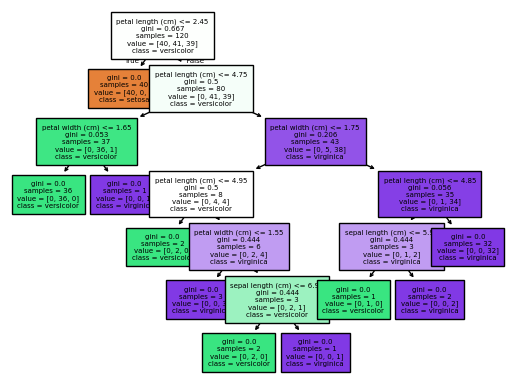

In [6]:
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True,fontsize=5)
plt.show()

In [11]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix #Matriz de confusion ára las comparacion y evaluaciones
classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
print(classification_report(y_train,model.predict(X_train), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        41
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [19]:
parametros = {
    'ccp_alpha': [0.0, 0.01, 0.1],
    'max_depth': [None, 2, 3, 4, 5, 10]  
}

In [20]:
from sklearn.model_selection import GridSearchCV, KFold

# Supongamos que model y parametros están definidos anteriormente
cv = KFold(n_splits=5, shuffle=True, random_state=42)
pc_grid = GridSearchCV(model, parametros, cv=cv, scoring='accuracy')
pc_grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [None, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [21]:
parametros = {
    'ccp_alpha': [0.0, 0.01, 0.1],
    'max_depth': [None, 2, 3, 4, 5, 10]  # Corregido el nombre del parámetro
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
pc_grid = GridSearchCV(model, parametros, cv=cv, scoring='accuracy')
pc_grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [None, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [22]:
pc_grid.best_params_  #No tiene poda es tal cual el dato y en un maximo de 3 iteraciones

{'ccp_alpha': 0.0, 'max_depth': 4}